# Project 2: part4

## Import libraries

In [1]:
from pymonntorch import *
import torch

import matplotlib.pyplot as plt
from simulate import Simulation
from models.activity import ActivityRecorder
from models.dendrites import Dendrite
from models.currents import ConstantCurrent, NoisyCurrent, SetCurrent, CurrentSum, StepCurrent, RandomCurrent
from models.neurons import LIF
from models.synapses import SimpleSynapse, FullyConnectedSynapse, RandomConnectedFixedProbSynapse, \
    RandomConnectedFixedInputSynapse
from models.time_res import TimeResolution

In [2]:
def plot_weight_distribution(weight_matrix, bins=50, density=True):
    # Flatten the weight matrix into a 1D array
    weights_flat = weight_matrix.flatten()

    # Plot the distribution using a histogram
    plt.hist(weights_flat, bins=bins, density=density, alpha=0.7, color='b')
    plt.title('Weight Matrix Distribution')
    plt.xlabel('Weight Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


# Part4

# Fully Connected Synapse

In [3]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}))
ng_exc1 =  sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(),
        2: StepCurrent(offset=5,
                       value=1,
                       noise_range=2,
                       t_start=500),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)
ng_exc2 =  sim.add_neuron_group(
    tag="ng_exc2",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=5,
                           noise_range=2),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc2_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc2_event")
    }
)
ng_inh = sim.add_neuron_group(
    tag="ng_inh",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=0),
        6: Dendrite(),
        7: LIF(
            tau=3,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=10,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_inh_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inh_event")
    }
)
# Synapse for inside connection of NG_EXC_1
syn_exc_1 = sim.add_synapse_group(
                   tag="exc1-exc1",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={4: FullyConnectedSynapse(j0=10, variance=0.75)})

# Synapse for inside connection of NG_EXC_2
syn_exc_2 = sim.add_synapse_group(
                   tag="exc2-exc2",
                   src=ng_exc2,
                   dst=ng_exc2,
                   behavior={4: FullyConnectedSynapse(j0=10, variance=0.75)})

# Synapse for inside connection of NG_INH
# syn_inh = net.add_synapse_group(
#                    tag="inh-inh",
#                    src=ng_inh,
#                    dst=ng_inh,
#                    behavior={4: RandomConnectedFixedInputSynapse(j0=-100, n=50, variance=0.45, alpha=0.9)})

# # Synapse for connection from NG_EXC_1 to NG_INH
syn_exc_1_inh = sim.add_synapse_group(
                   tag="exc1-inh",
                   src=ng_exc1,
                   dst=ng_inh,
                   behavior={4: FullyConnectedSynapse(j0=10, variance=0.75)})


# # Synapse for connection from to NG_INH to NG_EXC_1
syn_inh_exc_1 = sim.add_synapse_group(
                   tag="inh-exc1",
                   src=ng_inh,
                   dst=ng_exc1,
                   behavior={4: FullyConnectedSynapse(j0=10, variance=0.75)})

# # Synapse for connection from NG_EXC_2 to NG_INH
syn_exc_2_inh = sim.add_synapse_group(
                   tag="exc2-inh",
                   src=ng_exc2,
                   dst=ng_inh,
                   behavior={4: FullyConnectedSynapse(j0=10, variance=0.75)})
# # Synapse for connection from to NG_INH to NG_EXC_2
syn_inh_exc_2 = sim.add_synapse_group(
                   tag="inh-exc2",
                   src=ng_inh,
                   dst=ng_exc2,
                   behavior={4: FullyConnectedSynapse(j0=10, variance=0.75)})

sim.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(300)|3 groups, Synapses: tensor(60000)|6 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:StepCurrent(offset=5,value=1,noise_range=2,t_start=500,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
NeuronGroup['ng_exc2', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:ConstantCurrent(value=5,noise_range=2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc2_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=T

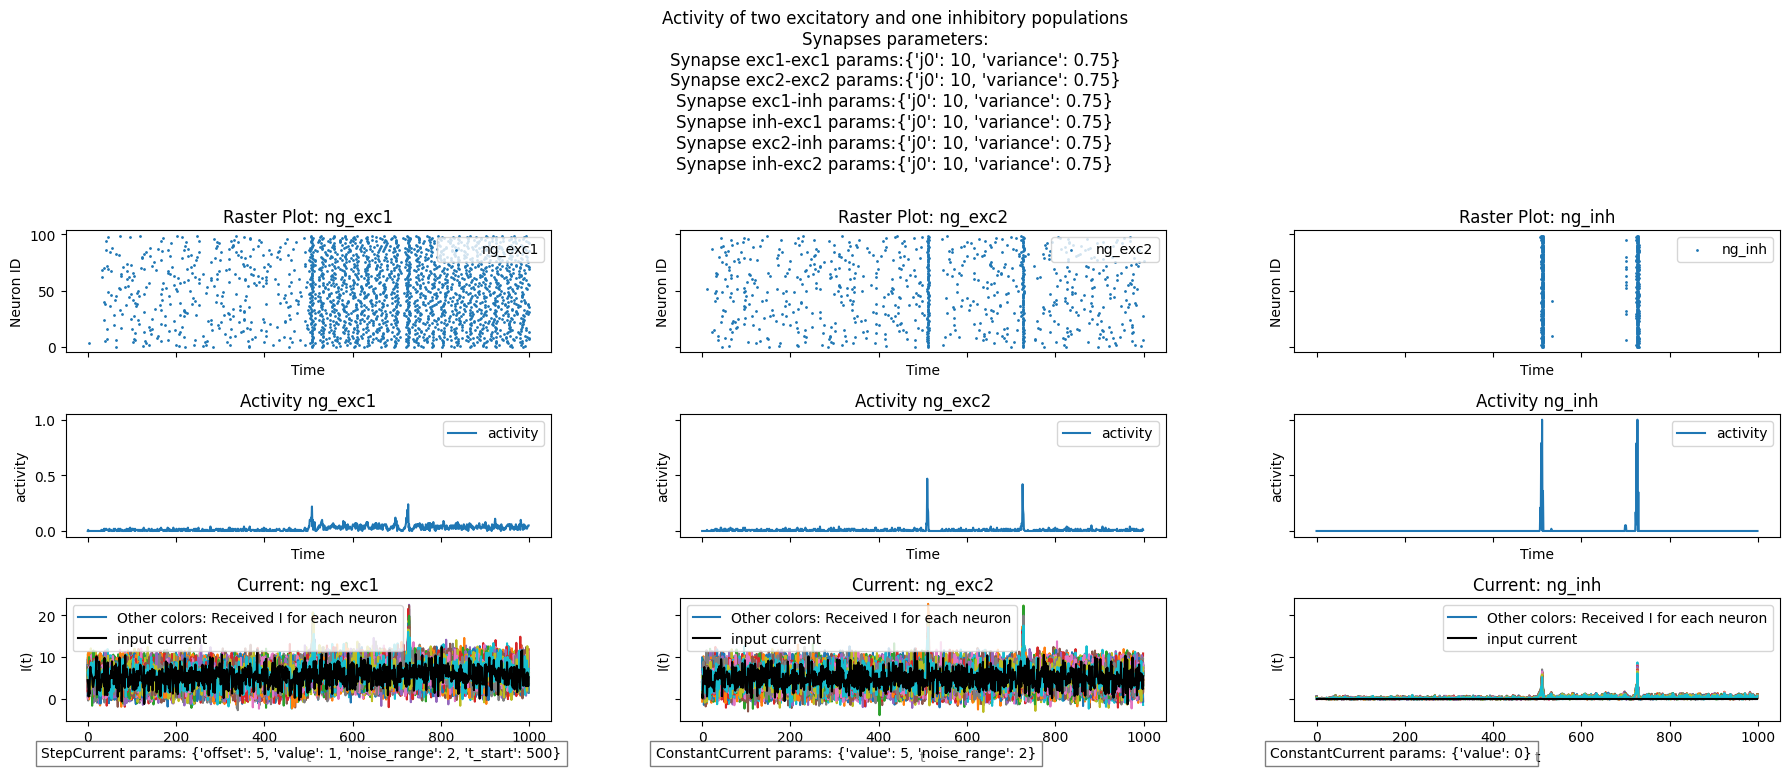

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(18, 8), sharex=True, sharey='row')
ng_exc1.add_raster_plot(axs[0, 0], s=1)
ng_exc2.add_raster_plot(axs[0, 1], s=1)
ng_inh.add_raster_plot(axs[0, 2], s=1)

ng_exc1.add_activity_plot(axs[1, 0])
ng_exc2.add_activity_plot(axs[1, 1])
ng_inh.add_activity_plot(axs[1, 2])

ng_exc1.add_current_plot(axs[2, 0])
ng_exc1.add_current_params_info(axs[2, 0], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_exc2.add_current_plot(axs[2, 1])
ng_exc2.add_current_params_info(axs[2, 1], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_inh.add_current_plot(axs[2, 2])
ng_inh.add_current_params_info(axs[2, 2], text_x=-0.05, text_y=-0.3, current_idx=2)

# sim.add_synapses_params_info(axs[2, 1], text_y=-0.5, synapse_idx=4)
fig.suptitle("Activity of two excitatory and one inhibitory populations\n" + sim.get_synapses_params_info())
plt.tight_layout()
plt.savefig("report/plots/part4-full-synapse.pdf")
plt.show()

# Random coupling: Fixed coupling probability

In [5]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}))
ng_exc1 =  sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(),
        2: StepCurrent(offset=5,
                       value=1,
                       noise_range=2,
                       t_start=500),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)
ng_exc2 =  sim.add_neuron_group(
    tag="ng_exc2",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=5,
                           noise_range=2),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc2_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc2_event")
    }
)
ng_inh = sim.add_neuron_group(
    tag="ng_inh",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=0),
        6: Dendrite(),
        7: LIF(
            tau=3,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=10,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_inh_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inh_event")
    }
)
# Synapse for inside connection of NG_EXC_1
syn_exc_1 = sim.add_synapse_group(
                   tag="exc1-exc1",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedProbSynapse(j0=7, p=0.20, variance=0.75)})

# Synapse for inside connection of NG_EXC_2
syn_exc_2 = sim.add_synapse_group(
                   tag="exc2-exc2",
                   src=ng_exc2,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedProbSynapse(j0=7, p=0.20, variance=0.75)})

# Synapse for inside connection of NG_INH
# syn_inh = net.add_synapse_group(
#                    tag="inh-inh",
#                    src=ng_inh,
#                    dst=ng_inh,
#                    behavior={4: RandomConnectedFixedInputSynapse(j0=-100, n=50, variance=0.45, alpha=0.9)})

# # Synapse for connection from NG_EXC_1 to NG_INH
syn_exc_1_inh = sim.add_synapse_group(
                   tag="exc1-inh",
                   src=ng_exc1,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedProbSynapse(j0=15, p=0.20, variance=0.75),
                             9: Recorder(variables=["I"], tag="exc1-inh_rec")})

# # Synapse for connection from to NG_INH to NG_EXC_1
syn_inh_exc_1 = sim.add_synapse_group(
                   tag="inh-exc1",
                   src=ng_inh,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedProbSynapse(j0=-12, p=0.12, variance=0.75)})

# # Synapse for connection from NG_EXC_2 to NG_INH
syn_exc_2_inh = sim.add_synapse_group(
                   tag="exc2-inh",
                   src=ng_exc2,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedProbSynapse(j0=15, p=0.20, variance=0.75)})
# # Synapse for connection from to NG_INH to NG_EXC_2
syn_inh_exc_2 = sim.add_synapse_group(
                   tag="inh-exc2",
                   src=ng_inh,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedProbSynapse(j0=-12, p=0.12, variance=0.75)})

sim.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(300)|3 groups, Synapses: tensor(60000)|6 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:StepCurrent(offset=5,value=1,noise_range=2,t_start=500,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
NeuronGroup['ng_exc2', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:ConstantCurrent(value=5,noise_range=2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc2_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=T

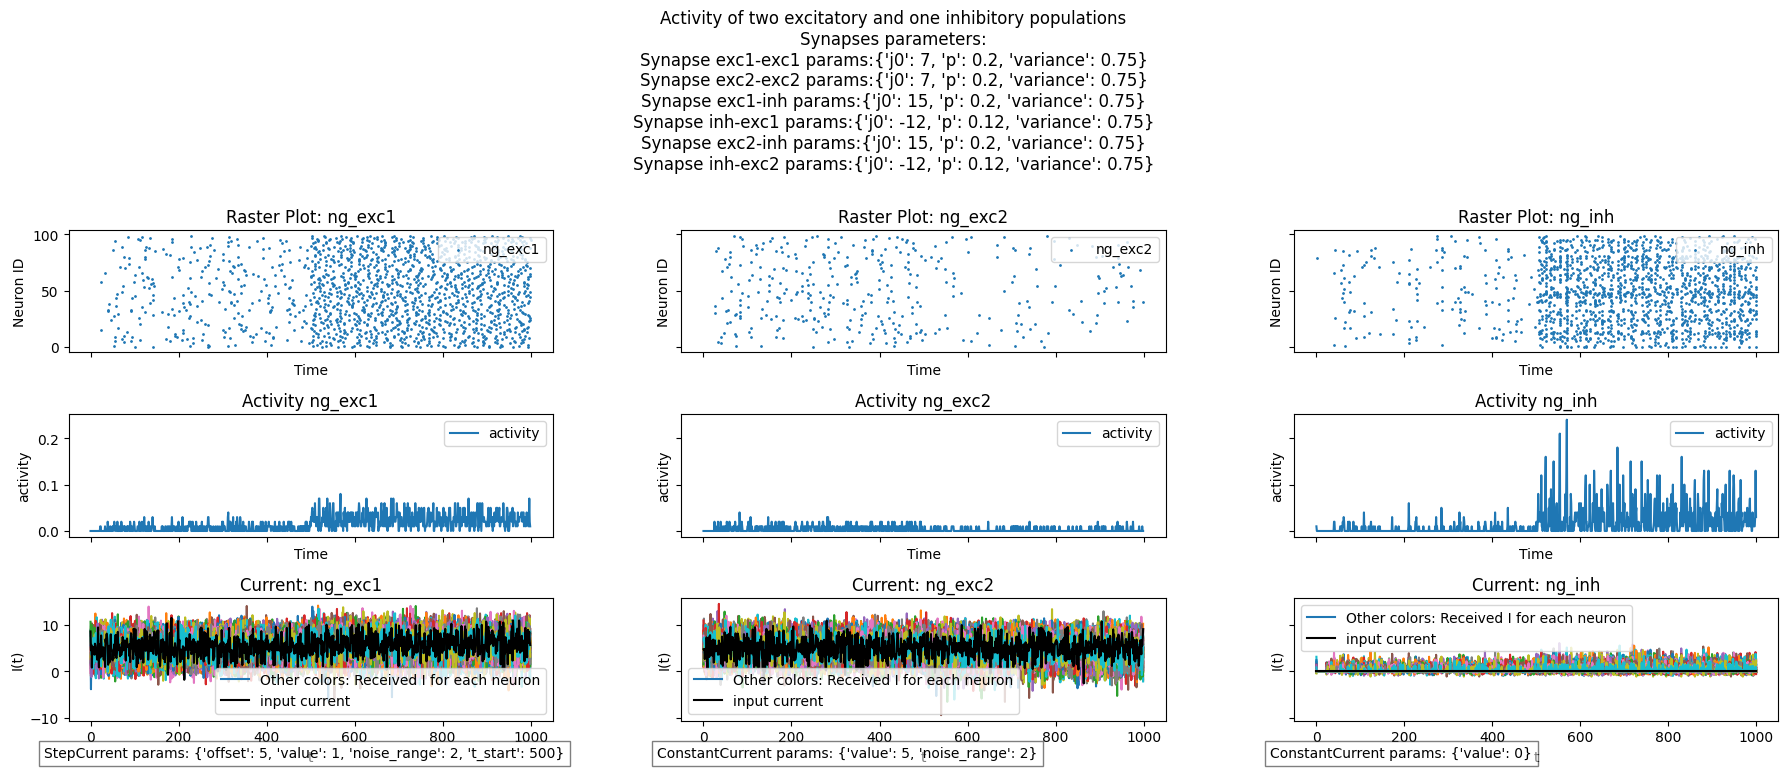

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(18, 8), sharex=True, sharey='row')
ng_exc1.add_raster_plot(axs[0, 0], s=1)
ng_exc2.add_raster_plot(axs[0, 1], s=1)
ng_inh.add_raster_plot(axs[0, 2], s=1)

ng_exc1.add_activity_plot(axs[1, 0])
ng_exc2.add_activity_plot(axs[1, 1])
ng_inh.add_activity_plot(axs[1, 2])

ng_exc1.add_current_plot(axs[2, 0])
ng_exc1.add_current_params_info(axs[2, 0], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_exc2.add_current_plot(axs[2, 1])
ng_exc2.add_current_params_info(axs[2, 1], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_inh.add_current_plot(axs[2, 2])
ng_inh.add_current_params_info(axs[2, 2], text_x=-0.05, text_y=-0.3, current_idx=2)

# sim.add_synapses_params_info(axs[2, 1], text_y=-0.5, synapse_idx=4)
fig.suptitle("Activity of two excitatory and one inhibitory populations\n" + sim.get_synapses_params_info())
plt.tight_layout()
plt.savefig("report/plots/part4-prob-synapse.pdf")
plt.show()

# Random coupling: Fixed coupling probability

In [7]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}))
ng_exc1 =  sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(),
        2: StepCurrent(offset=5,
                       value=1,
                       noise_range=2,
                       t_start=500),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)
ng_exc2 =  sim.add_neuron_group(
    tag="ng_exc2",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=5,
                           noise_range=2),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc2_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc2_event")
    }
)
ng_inh = sim.add_neuron_group(
    tag="ng_inh",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=0),
        6: Dendrite(),
        7: LIF(
            tau=3,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=10,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_inh_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inh_event")
    }
)
# Synapse for inside connection of NG_EXC_1
syn_exc_1 = sim.add_synapse_group(
                   tag="exc1-exc1",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=7, n=20, variance=0.75)})

# Synapse for inside connection of NG_EXC_2
syn_exc_2 = sim.add_synapse_group(
                   tag="exc2-exc2",
                   src=ng_exc2,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=7, n=20, variance=0.75)})

# Synapse for inside connection of NG_INH
# syn_inh = net.add_synapse_group(
#                    tag="inh-inh",
#                    src=ng_inh,
#                    dst=ng_inh,
#                    behavior={4: RandomConnectedFixedInputSynapse(j0=-100, n=50, variance=0.45, alpha=0.9)})

# # Synapse for connection from NG_EXC_1 to NG_INH
syn_exc_1_inh = sim.add_synapse_group(
                   tag="exc1-inh",
                   src=ng_exc1,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=15, n=20, variance=0.75),
                             9: Recorder(variables=["I"], tag="exc1-inh_rec")})

# # Synapse for connection from to NG_INH to NG_EXC_1
syn_inh_exc_1 = sim.add_synapse_group(
                   tag="inh-exc1",
                   src=ng_inh,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-12, n=12, variance=0.75)})

# # Synapse for connection from NG_EXC_2 to NG_INH
syn_exc_2_inh = sim.add_synapse_group(
                   tag="exc2-inh",
                   src=ng_exc2,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=15, n=20, variance=0.75)})
# # Synapse for connection from to NG_INH to NG_EXC_2
syn_inh_exc_2 = sim.add_synapse_group(
                   tag="inh-exc2",
                   src=ng_inh,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-12, n=12, variance=0.75)})

sim.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(300)|3 groups, Synapses: tensor(60000)|6 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:StepCurrent(offset=5,value=1,noise_range=2,t_start=500,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
NeuronGroup['ng_exc2', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:ConstantCurrent(value=5,noise_range=2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc2_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=T

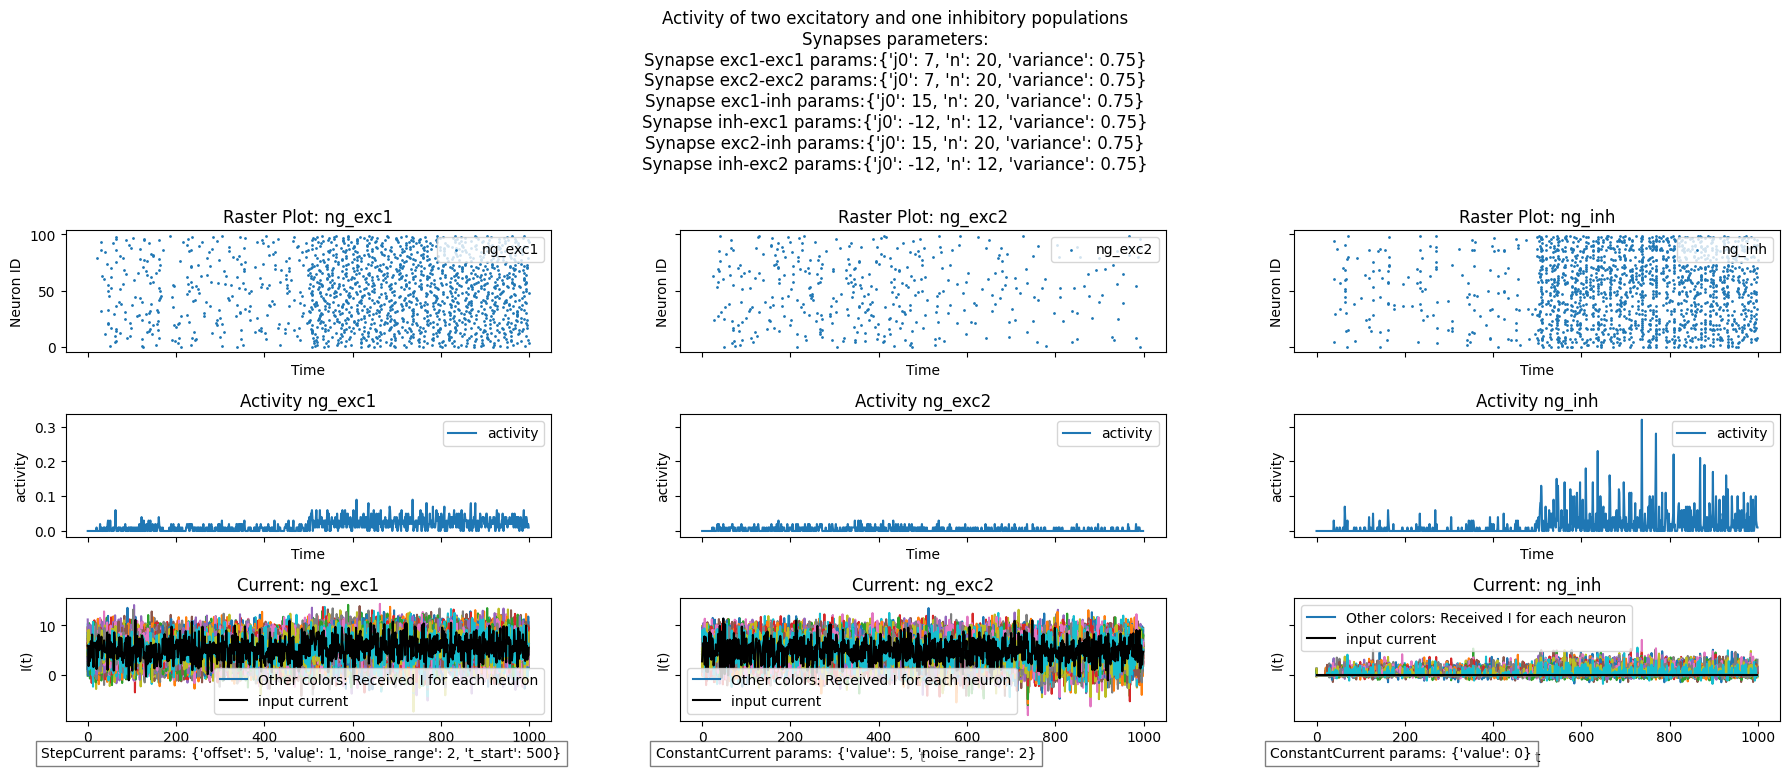

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(18, 8), sharex=True, sharey='row')
ng_exc1.add_raster_plot(axs[0, 0], s=1)
ng_exc2.add_raster_plot(axs[0, 1], s=1)
ng_inh.add_raster_plot(axs[0, 2], s=1)

ng_exc1.add_activity_plot(axs[1, 0])
ng_exc2.add_activity_plot(axs[1, 1])
ng_inh.add_activity_plot(axs[1, 2])

ng_exc1.add_current_plot(axs[2, 0])
ng_exc1.add_current_params_info(axs[2, 0], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_exc2.add_current_plot(axs[2, 1])
ng_exc2.add_current_params_info(axs[2, 1], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_inh.add_current_plot(axs[2, 2])
ng_inh.add_current_params_info(axs[2, 2], text_x=-0.05, text_y=-0.3, current_idx=2)

# sim.add_synapses_params_info(axs[2, 1], text_y=-0.5, synapse_idx=4)
fig.suptitle("Activity of two excitatory and one inhibitory populations\n" + sim.get_synapses_params_info())
plt.tight_layout()
plt.savefig("report/plots/part4-fixed-synapse.pdf")
plt.show()

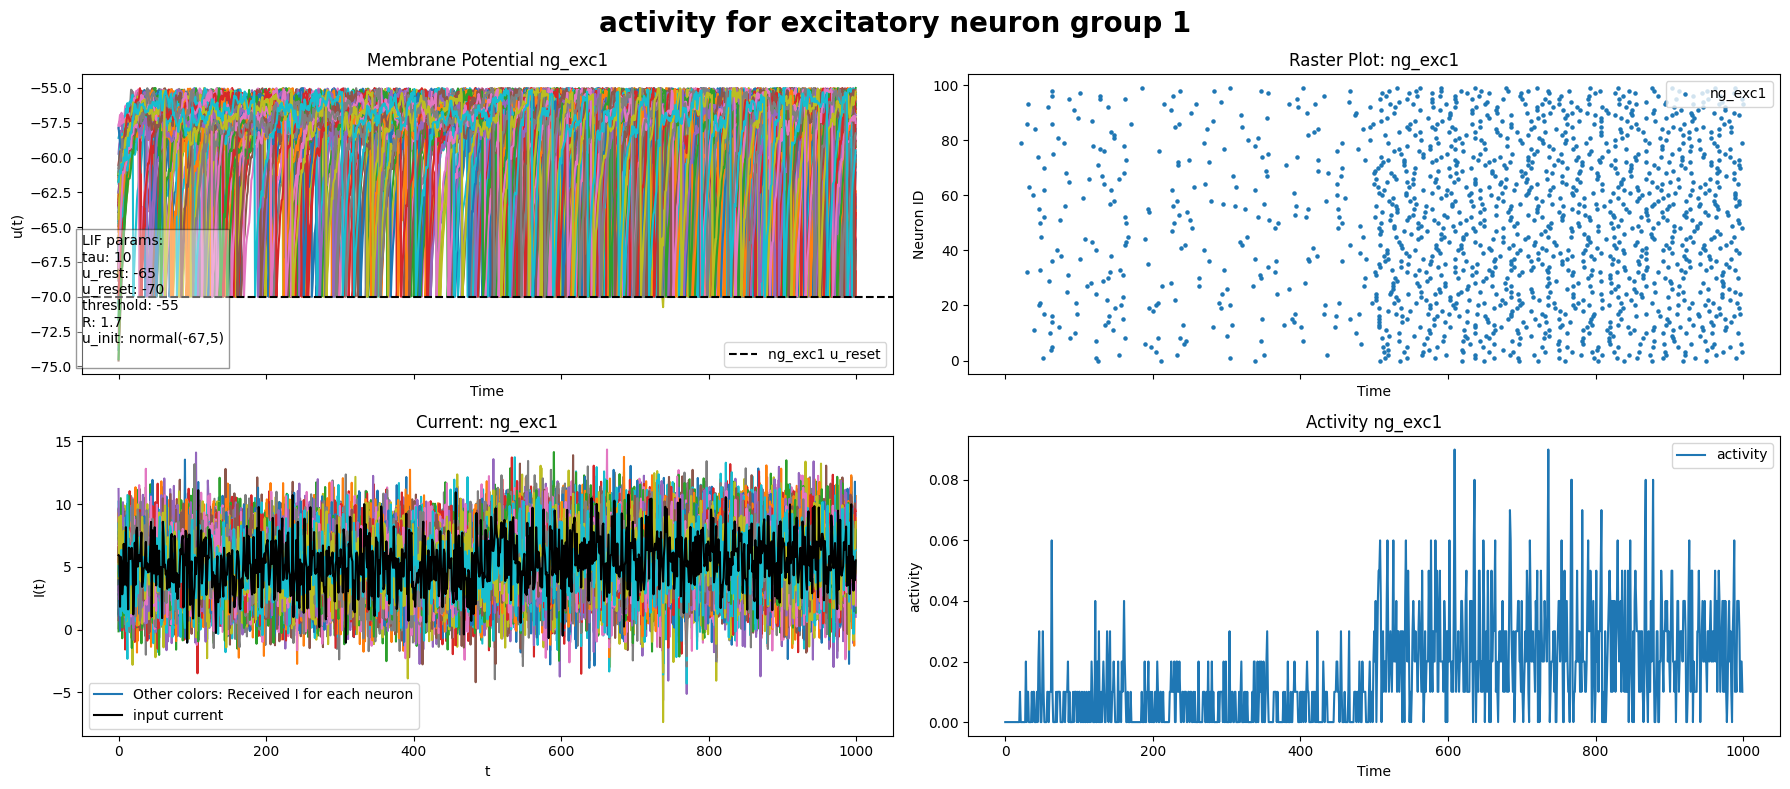

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc1.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc1.add_neuron_model_params_info(axs[0, 0], model_idx=7)

ng_exc1.add_current_plot(axs[1, 0])
ng_exc1.add_raster_plot(axs[0, 1])
ng_exc1.add_activity_plot(axs[1, 1])
fig.suptitle("activity for excitatory neuron group 1", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

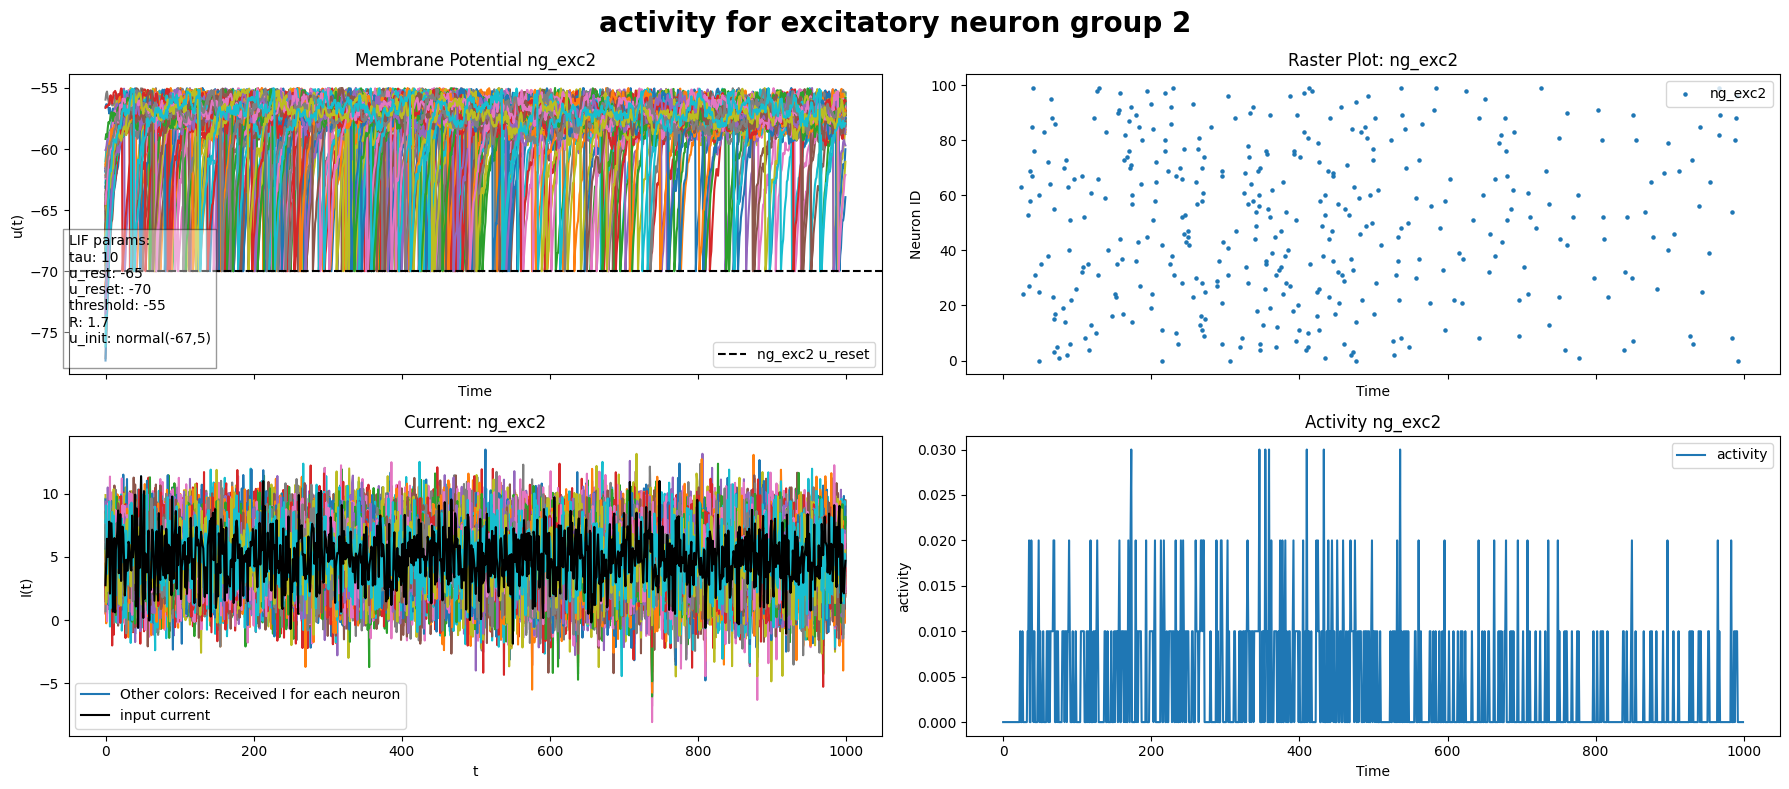

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_exc2.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_exc2.add_neuron_model_params_info(axs[0, 0], model_idx=7)

ng_exc2.add_current_plot(axs[1, 0])
ng_exc2.add_raster_plot(axs[0, 1])
ng_exc2.add_activity_plot(axs[1, 1])
fig.suptitle("activity for excitatory neuron group 2", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

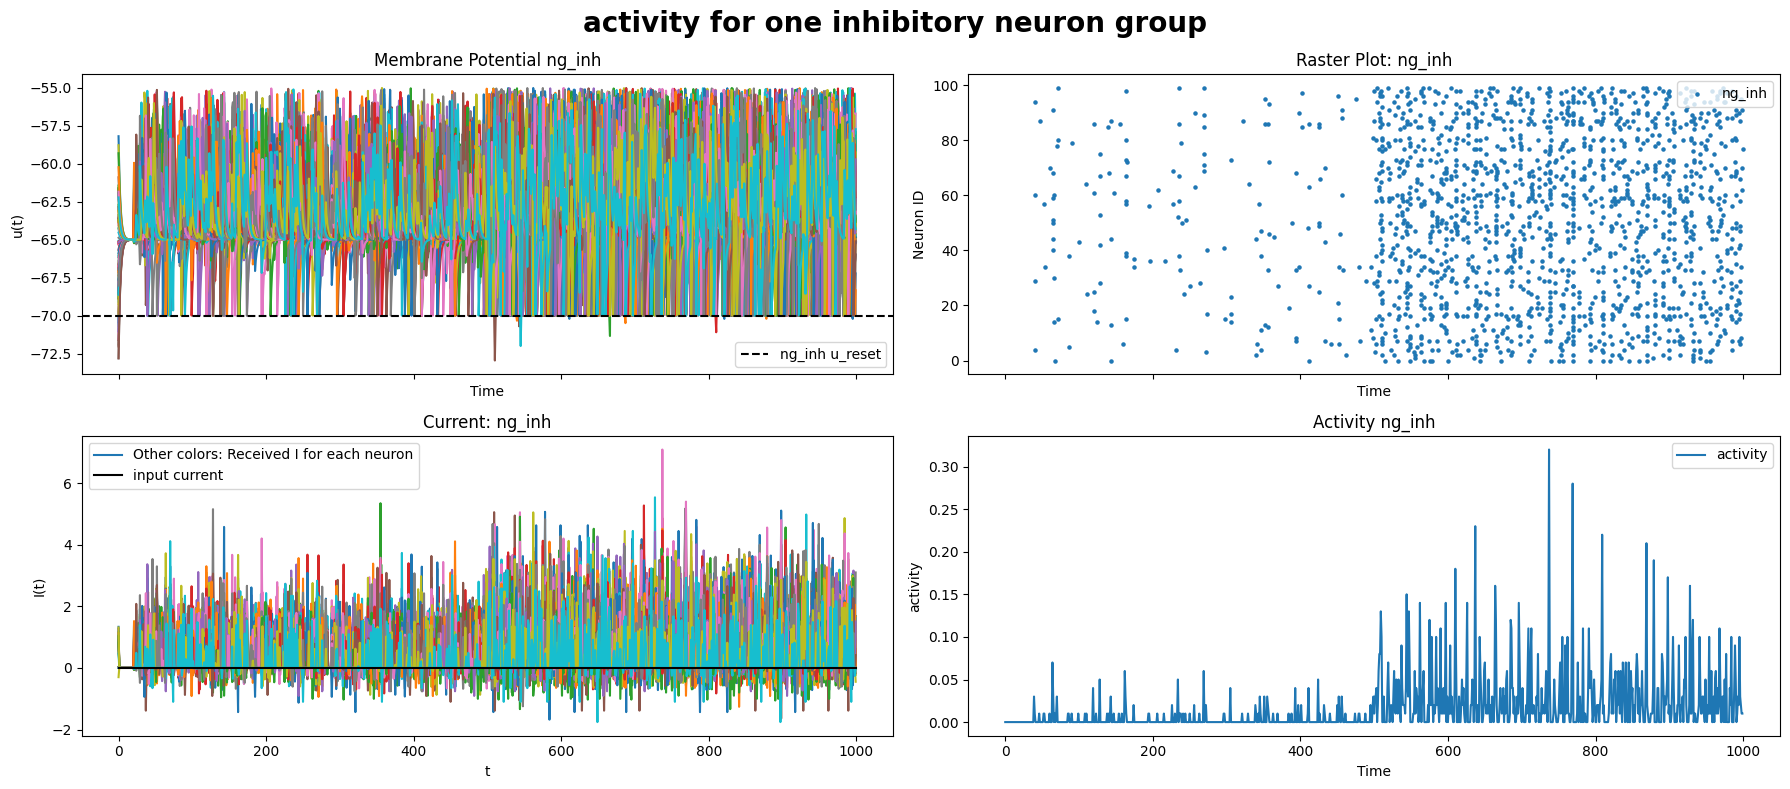

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8), sharex=True)
ng_inh.add_membrane_potential_plot(axs[0, 0], model_idx=7)
ng_inh.add_current_plot(axs[1, 0])
ng_inh.add_raster_plot(axs[0, 1])
ng_inh.add_activity_plot(axs[1, 1])
fig.suptitle("activity for one inhibitory neuron group", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


In [12]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}))
ng_exc1 =  sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(),
        2: StepCurrent(offset=6.5,
                       value=1,
                       noise_range=2,
                       t_start=500),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)
ng_exc2 =  sim.add_neuron_group(
    tag="ng_exc2",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=6.5,
                           noise_range=2),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc2_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc2_event")
    }
)
ng_inh = sim.add_neuron_group(
    tag="ng_inh",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=0),
        6: Dendrite(),
        7: LIF(
            tau=3,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=10,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_inh_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inh_event")
    }
)
# Synapse for inside connection of NG_EXC_1
syn_exc_1 = sim.add_synapse_group(
                   tag="exc1-exc1",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=7, n=20, variance=0.75)})

# Synapse for inside connection of NG_EXC_2
syn_exc_2 = sim.add_synapse_group(
                   tag="exc2-exc2",
                   src=ng_exc2,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=7, n=20, variance=0.75)})

# Synapse for inside connection of NG_INH
# syn_inh = net.add_synapse_group(
#                    tag="inh-inh",
#                    src=ng_inh,
#                    dst=ng_inh,
#                    behavior={4: RandomConnectedFixedInputSynapse(j0=-100, n=50, variance=0.45, alpha=0.9)})

# # Synapse for connection from NG_EXC_1 to NG_INH
syn_exc_1_inh = sim.add_synapse_group(
                   tag="exc1-inh",
                   src=ng_exc1,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=15, n=20, variance=0.75),
                             9: Recorder(variables=["I"], tag="exc1-inh_rec")})

# # Synapse for connection from to NG_INH to NG_EXC_1
syn_inh_exc_1 = sim.add_synapse_group(
                   tag="inh-exc1",
                   src=ng_inh,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-12, n=12, variance=0.75)})

# # Synapse for connection from NG_EXC_2 to NG_INH
syn_exc_2_inh = sim.add_synapse_group(
                   tag="exc2-inh",
                   src=ng_exc2,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=15, n=20, variance=0.75)})
# # Synapse for connection from to NG_INH to NG_EXC_2
syn_inh_exc_2 = sim.add_synapse_group(
                   tag="inh-exc2",
                   src=ng_inh,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-12, n=12, variance=0.75)})

sim.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(300)|3 groups, Synapses: tensor(60000)|6 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:StepCurrent(offset=6.5,value=1,noise_range=2,t_start=500,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
NeuronGroup['ng_exc2', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:ConstantCurrent(value=6.5,noise_range=2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc2_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annota

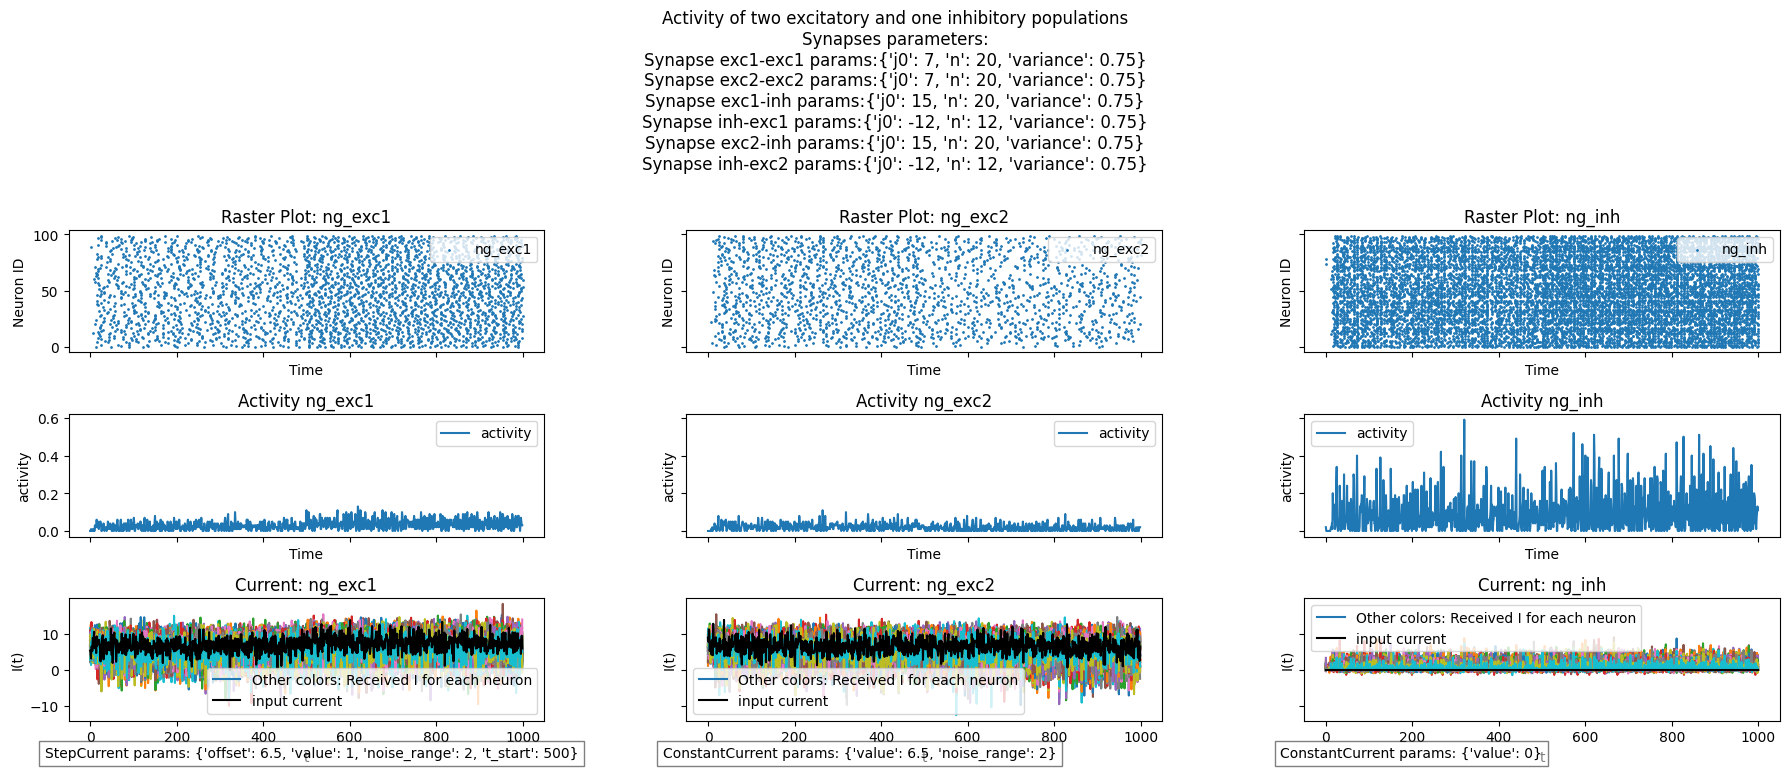

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(18, 8), sharex=True, sharey='row')
ng_exc1.add_raster_plot(axs[0, 0], s=1)
ng_exc2.add_raster_plot(axs[0, 1], s=1)
ng_inh.add_raster_plot(axs[0, 2], s=1)

ng_exc1.add_activity_plot(axs[1, 0])
ng_exc2.add_activity_plot(axs[1, 1])
ng_inh.add_activity_plot(axs[1, 2])

ng_exc1.add_current_plot(axs[2, 0])
ng_exc1.add_current_params_info(axs[2, 0], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_exc2.add_current_plot(axs[2, 1])
ng_exc2.add_current_params_info(axs[2, 1], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_inh.add_current_plot(axs[2, 2])
ng_inh.add_current_params_info(axs[2, 2], text_x=-0.05, text_y=-0.3, current_idx=2)

# sim.add_synapses_params_info(axs[2, 1], text_y=-0.5, synapse_idx=4)
fig.suptitle("Activity of two excitatory and one inhibitory populations\n" + sim.get_synapses_params_info())
plt.tight_layout()
plt.savefig("report/plots/part4-fixed-synapse-high-curr.pdf")
plt.show()

### Same parameters

In [14]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}))
ng_exc1 =  sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(),
        2: StepCurrent(offset=5,
                       value=1,
                       noise_range=2,
                       t_start=500),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)
ng_exc2 =  sim.add_neuron_group(
    tag="ng_exc2",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=5,
                           noise_range=2),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc2_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc2_event")
    }
)
ng_inh = sim.add_neuron_group(
    tag="ng_inh",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=0),
        6: Dendrite(),
        7: LIF(
            tau=3,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=10,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_inh_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inh_event")
    }
)
# Synapse for inside connection of NG_EXC_1
syn_exc_1 = sim.add_synapse_group(
                   tag="exc1-exc1",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})

# Synapse for inside connection of NG_EXC_2
syn_exc_2 = sim.add_synapse_group(
                   tag="exc2-exc2",
                   src=ng_exc2,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})

# Synapse for inside connection of NG_INH
# syn_inh = net.add_synapse_group(
#                    tag="inh-inh",
#                    src=ng_inh,
#                    dst=ng_inh,
#                    behavior={4: RandomConnectedFixedInputSynapse(j0=-100, n=50, variance=0.45, alpha=0.9)})

# # Synapse for connection from NG_EXC_1 to NG_INH
syn_exc_1_inh = sim.add_synapse_group(
                   tag="exc1-inh",
                   src=ng_exc1,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})


# # Synapse for connection from to NG_INH to NG_EXC_1
syn_inh_exc_1 = sim.add_synapse_group(
                   tag="inh-exc1",
                   src=ng_inh,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-5, n=10, variance=0.75)})

# # Synapse for connection from NG_EXC_2 to NG_INH
syn_exc_2_inh = sim.add_synapse_group(
                   tag="exc2-inh",
                   src=ng_exc2,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})
# # Synapse for connection from to NG_INH to NG_EXC_2
syn_inh_exc_2 = sim.add_synapse_group(
                   tag="inh-exc2",
                   src=ng_inh,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-5, n=10, variance=0.75)})

sim.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(300)|3 groups, Synapses: tensor(60000)|6 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:StepCurrent(offset=5,value=1,noise_range=2,t_start=500,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
NeuronGroup['ng_exc2', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:ConstantCurrent(value=5,noise_range=2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc2_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate

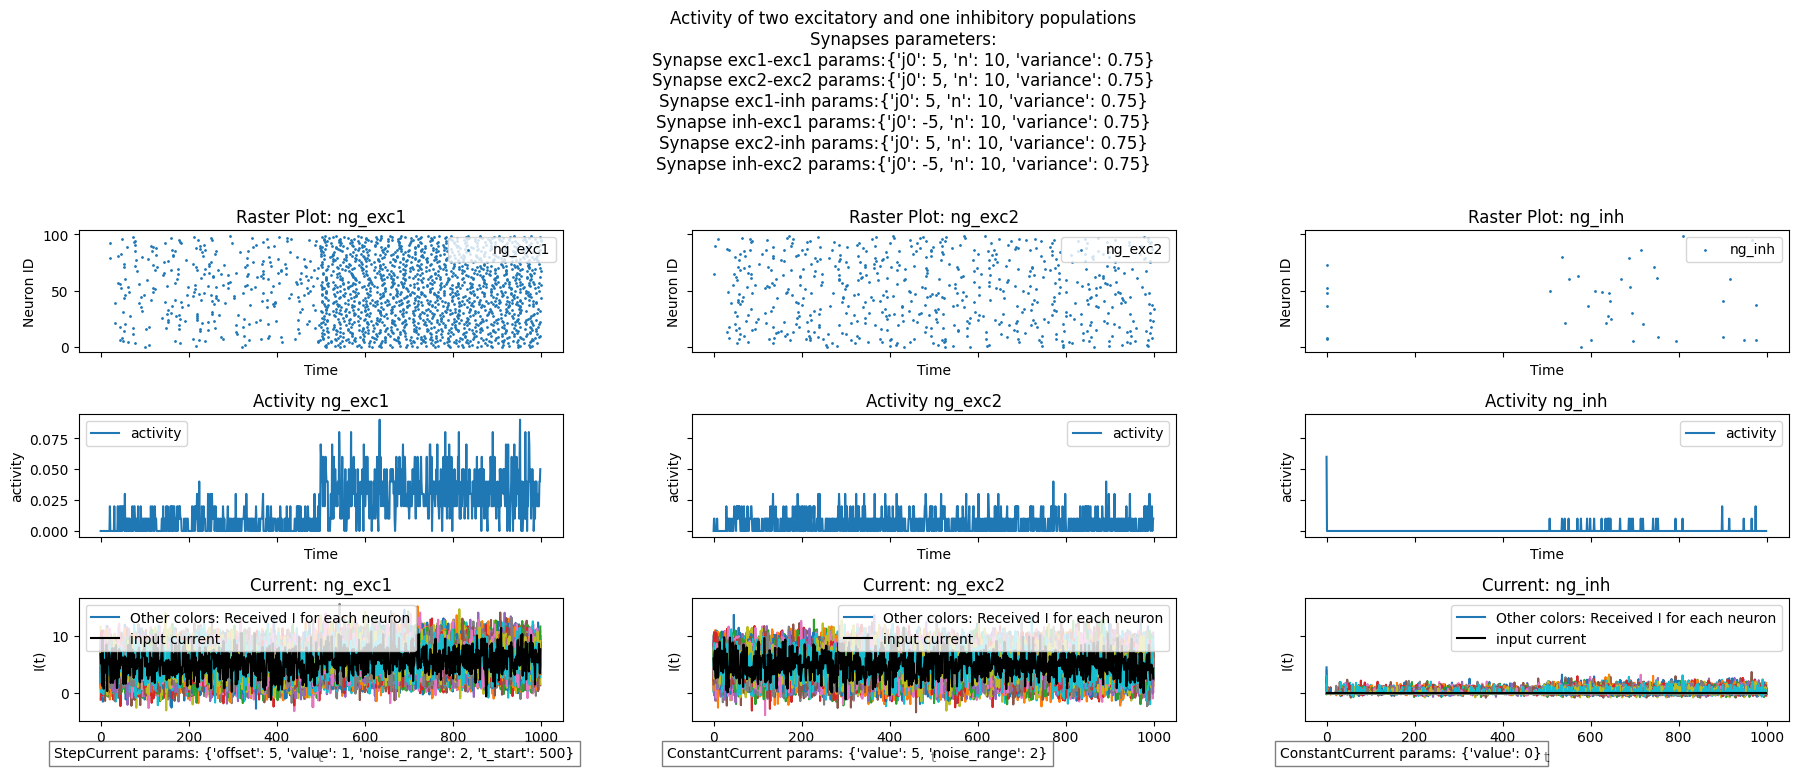

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(18, 8), sharex=True, sharey='row')
ng_exc1.add_raster_plot(axs[0, 0], s=1)
ng_exc2.add_raster_plot(axs[0, 1], s=1)
ng_inh.add_raster_plot(axs[0, 2], s=1)

ng_exc1.add_activity_plot(axs[1, 0])
ng_exc2.add_activity_plot(axs[1, 1])
ng_inh.add_activity_plot(axs[1, 2])

ng_exc1.add_current_plot(axs[2, 0])
ng_exc1.add_current_params_info(axs[2, 0], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_exc2.add_current_plot(axs[2, 1])
ng_exc2.add_current_params_info(axs[2, 1], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_inh.add_current_plot(axs[2, 2])
ng_inh.add_current_params_info(axs[2, 2], text_x=-0.05, text_y=-0.3, current_idx=2)

# sim.add_synapses_params_info(axs[2, 1], text_y=-0.5, synapse_idx=4)
fig.suptitle("Activity of two excitatory and one inhibitory populations\n" + sim.get_synapses_params_info())
plt.tight_layout()
plt.savefig("report/plots/part4-fixed-synapse-same-param.pdf")
plt.show()

increase j0 in exc-inh's

In [16]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}))
ng_exc1 =  sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(),
        2: StepCurrent(offset=5,
                       value=1,
                       noise_range=2,
                       t_start=500),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)
ng_exc2 =  sim.add_neuron_group(
    tag="ng_exc2",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=5,
                           noise_range=2),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc2_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc2_event")
    }
)
ng_inh = sim.add_neuron_group(
    tag="ng_inh",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=0),
        6: Dendrite(),
        7: LIF(
            tau=3,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=10,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_inh_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inh_event")
    }
)
# Synapse for inside connection of NG_EXC_1
syn_exc_1 = sim.add_synapse_group(
                   tag="exc1-exc1",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})

# Synapse for inside connection of NG_EXC_2
syn_exc_2 = sim.add_synapse_group(
                   tag="exc2-exc2",
                   src=ng_exc2,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})

# Synapse for inside connection of NG_INH
# syn_inh = net.add_synapse_group(
#                    tag="inh-inh",
#                    src=ng_inh,
#                    dst=ng_inh,
#                    behavior={4: RandomConnectedFixedInputSynapse(j0=-100, n=50, variance=0.45, alpha=0.9)})

# # Synapse for connection from NG_EXC_1 to NG_INH
syn_exc_1_inh = sim.add_synapse_group(
                   tag="exc1-inh",
                   src=ng_exc1,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=10, n=10, variance=0.75)})


# # Synapse for connection from to NG_INH to NG_EXC_1
syn_inh_exc_1 = sim.add_synapse_group(
                   tag="inh-exc1",
                   src=ng_inh,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-5, n=10, variance=0.75)})

# # Synapse for connection from NG_EXC_2 to NG_INH
syn_exc_2_inh = sim.add_synapse_group(
                   tag="exc2-inh",
                   src=ng_exc2,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=10, n=10, variance=0.75)})
# # Synapse for connection from to NG_INH to NG_EXC_2
syn_inh_exc_2 = sim.add_synapse_group(
                   tag="inh-exc2",
                   src=ng_inh,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-5, n=10, variance=0.75)})

sim.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(300)|3 groups, Synapses: tensor(60000)|6 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:StepCurrent(offset=5,value=1,noise_range=2,t_start=500,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
NeuronGroup['ng_exc2', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:ConstantCurrent(value=5,noise_range=2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc2_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate

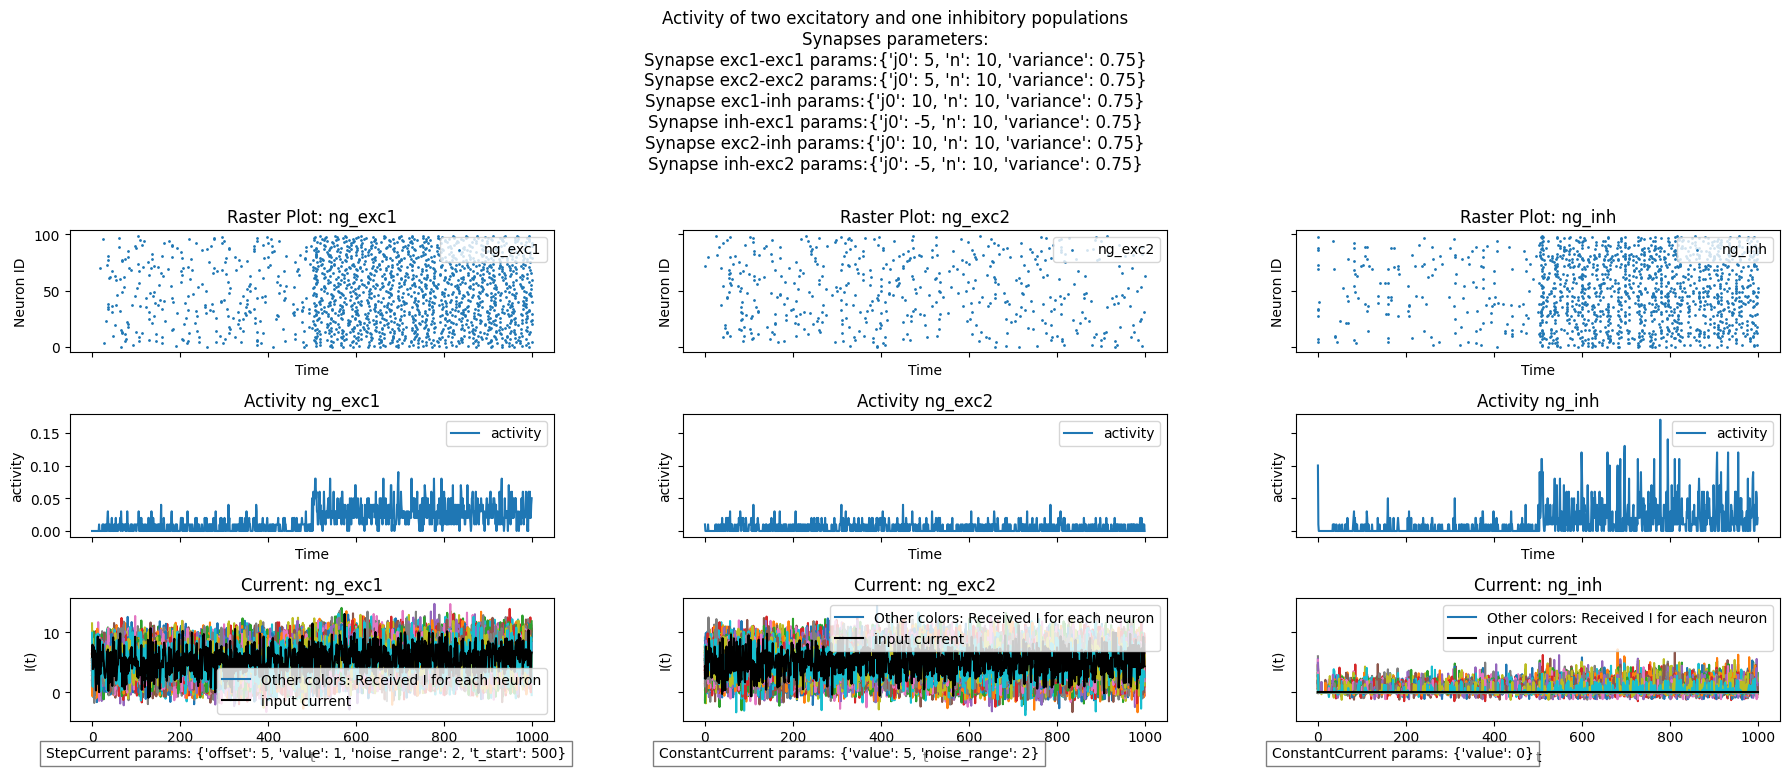

In [17]:
fig, axs = plt.subplots(3, 3, figsize=(18, 8), sharex=True, sharey='row')
ng_exc1.add_raster_plot(axs[0, 0], s=1)
ng_exc2.add_raster_plot(axs[0, 1], s=1)
ng_inh.add_raster_plot(axs[0, 2], s=1)

ng_exc1.add_activity_plot(axs[1, 0])
ng_exc2.add_activity_plot(axs[1, 1])
ng_inh.add_activity_plot(axs[1, 2])

ng_exc1.add_current_plot(axs[2, 0])
ng_exc1.add_current_params_info(axs[2, 0], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_exc2.add_current_plot(axs[2, 1])
ng_exc2.add_current_params_info(axs[2, 1], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_inh.add_current_plot(axs[2, 2])
ng_inh.add_current_params_info(axs[2, 2], text_x=-0.05, text_y=-0.3, current_idx=2)

# sim.add_synapses_params_info(axs[2, 1], text_y=-0.5, synapse_idx=4)
fig.suptitle("Activity of two excitatory and one inhibitory populations\n" + sim.get_synapses_params_info())
plt.tight_layout()
plt.savefig("report/plots/part4-fixed-synapse-high-j-exc-inh.pdf")
plt.show()

Increase j in inh-exc

In [18]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}))
ng_exc1 =  sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(),
        2: StepCurrent(offset=5,
                       value=1,
                       noise_range=2,
                       t_start=500),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)
ng_exc2 =  sim.add_neuron_group(
    tag="ng_exc2",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=5,
                           noise_range=2),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc2_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc2_event")
    }
)
ng_inh = sim.add_neuron_group(
    tag="ng_inh",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=0),
        6: Dendrite(),
        7: LIF(
            tau=3,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=10,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_inh_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inh_event")
    }
)
# Synapse for inside connection of NG_EXC_1
syn_exc_1 = sim.add_synapse_group(
                   tag="exc1-exc1",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})

# Synapse for inside connection of NG_EXC_2
syn_exc_2 = sim.add_synapse_group(
                   tag="exc2-exc2",
                   src=ng_exc2,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})

# Synapse for inside connection of NG_INH
# syn_inh = net.add_synapse_group(
#                    tag="inh-inh",
#                    src=ng_inh,
#                    dst=ng_inh,
#                    behavior={4: RandomConnectedFixedInputSynapse(j0=-100, n=50, variance=0.45, alpha=0.9)})

# # Synapse for connection from NG_EXC_1 to NG_INH
syn_exc_1_inh = sim.add_synapse_group(
                   tag="exc1-inh",
                   src=ng_exc1,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})


# # Synapse for connection from to NG_INH to NG_EXC_1
syn_inh_exc_1 = sim.add_synapse_group(
                   tag="inh-exc1",
                   src=ng_inh,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-10, n=10, variance=0.75)})

# # Synapse for connection from NG_EXC_2 to NG_INH
syn_exc_2_inh = sim.add_synapse_group(
                   tag="exc2-inh",
                   src=ng_exc2,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})
# # Synapse for connection from to NG_INH to NG_EXC_2
syn_inh_exc_2 = sim.add_synapse_group(
                   tag="inh-exc2",
                   src=ng_inh,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-10, n=10, variance=0.75)})

sim.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(300)|3 groups, Synapses: tensor(60000)|6 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:StepCurrent(offset=5,value=1,noise_range=2,t_start=500,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
NeuronGroup['ng_exc2', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:ConstantCurrent(value=5,noise_range=2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc2_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate

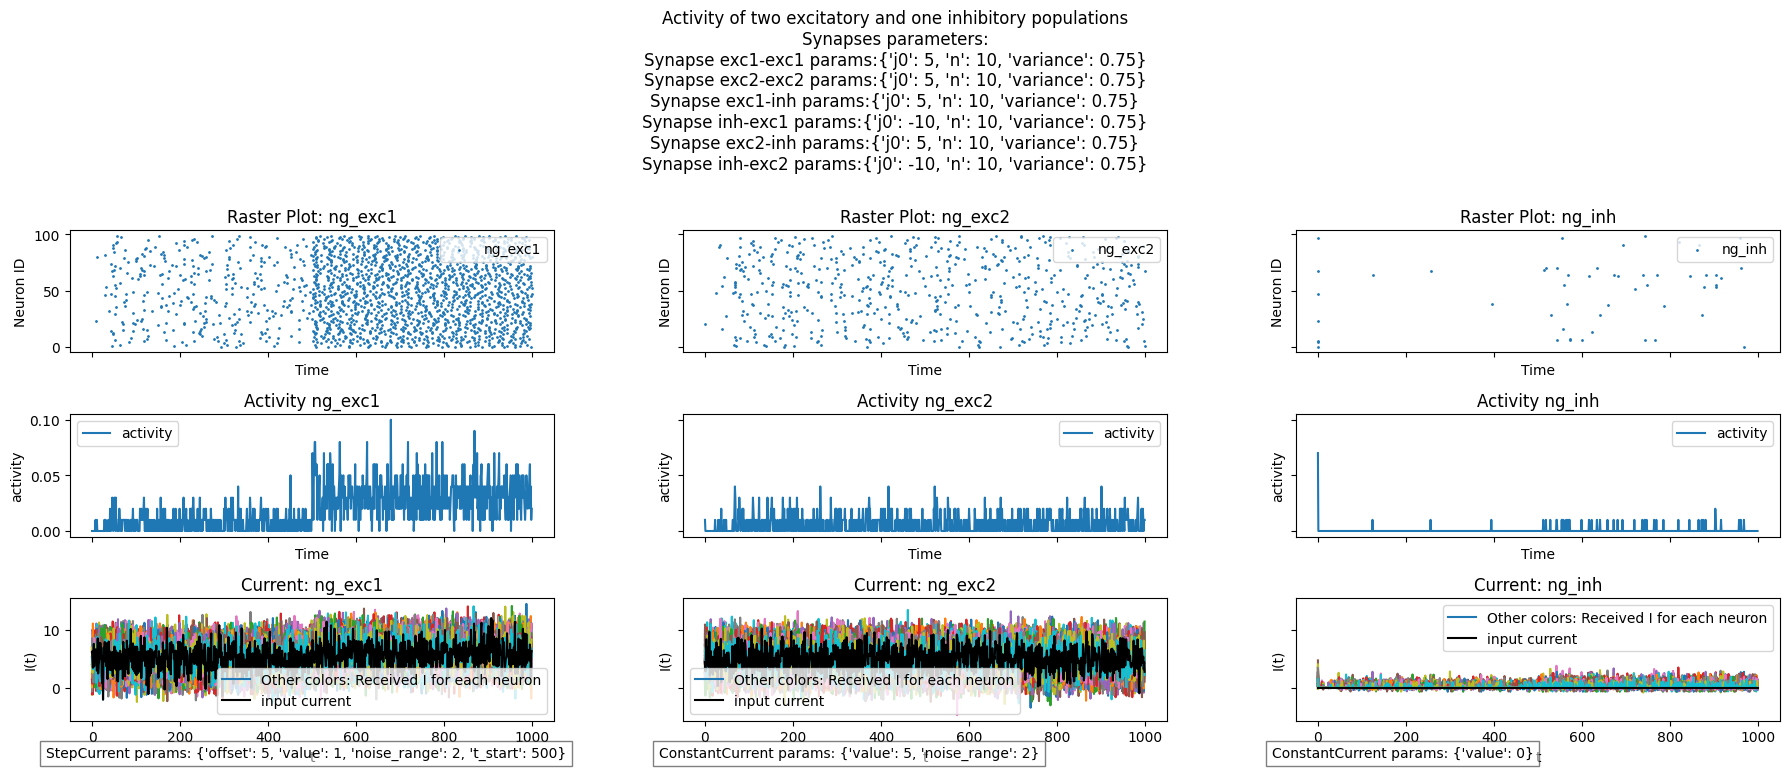

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(18, 8), sharex=True, sharey='row')
ng_exc1.add_raster_plot(axs[0, 0], s=1)
ng_exc2.add_raster_plot(axs[0, 1], s=1)
ng_inh.add_raster_plot(axs[0, 2], s=1)

ng_exc1.add_activity_plot(axs[1, 0])
ng_exc2.add_activity_plot(axs[1, 1])
ng_inh.add_activity_plot(axs[1, 2])

ng_exc1.add_current_plot(axs[2, 0])
ng_exc1.add_current_params_info(axs[2, 0], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_exc2.add_current_plot(axs[2, 1])
ng_exc2.add_current_params_info(axs[2, 1], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_inh.add_current_plot(axs[2, 2])
ng_inh.add_current_params_info(axs[2, 2], text_x=-0.05, text_y=-0.3, current_idx=2)

# sim.add_synapses_params_info(axs[2, 1], text_y=-0.5, synapse_idx=4)
fig.suptitle("Activity of two excitatory and one inhibitory populations\n" + sim.get_synapses_params_info())
plt.tight_layout()
plt.savefig("report/plots/part4-fixed-synapse-high-j-inh-exc.pdf")
plt.show()

### Change in n

High n in exc-inh

In [20]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}))
ng_exc1 =  sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(),
        2: StepCurrent(offset=5,
                       value=1,
                       noise_range=2,
                       t_start=500),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)
ng_exc2 =  sim.add_neuron_group(
    tag="ng_exc2",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=5,
                           noise_range=2),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc2_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc2_event")
    }
)
ng_inh = sim.add_neuron_group(
    tag="ng_inh",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=0),
        6: Dendrite(),
        7: LIF(
            tau=3,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=10,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_inh_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inh_event")
    }
)
# Synapse for inside connection of NG_EXC_1
syn_exc_1 = sim.add_synapse_group(
                   tag="exc1-exc1",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})

# Synapse for inside connection of NG_EXC_2
syn_exc_2 = sim.add_synapse_group(
                   tag="exc2-exc2",
                   src=ng_exc2,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})

# Synapse for inside connection of NG_INH
# syn_inh = net.add_synapse_group(
#                    tag="inh-inh",
#                    src=ng_inh,
#                    dst=ng_inh,
#                    behavior={4: RandomConnectedFixedInputSynapse(j0=-100, n=50, variance=0.45, alpha=0.9)})

# # Synapse for connection from NG_EXC_1 to NG_INH
syn_exc_1_inh = sim.add_synapse_group(
                   tag="exc1-inh",
                   src=ng_exc1,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=20, variance=0.75)})


# # Synapse for connection from to NG_INH to NG_EXC_1
syn_inh_exc_1 = sim.add_synapse_group(
                   tag="inh-exc1",
                   src=ng_inh,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-5, n=10, variance=0.75)})

# # Synapse for connection from NG_EXC_2 to NG_INH
syn_exc_2_inh = sim.add_synapse_group(
                   tag="exc2-inh",
                   src=ng_exc2,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=20, variance=0.75)})
# # Synapse for connection from to NG_INH to NG_EXC_2
syn_inh_exc_2 = sim.add_synapse_group(
                   tag="inh-exc2",
                   src=ng_inh,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-5, n=10, variance=0.75)})

sim.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(300)|3 groups, Synapses: tensor(60000)|6 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:StepCurrent(offset=5,value=1,noise_range=2,t_start=500,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
NeuronGroup['ng_exc2', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:ConstantCurrent(value=5,noise_range=2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc2_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate

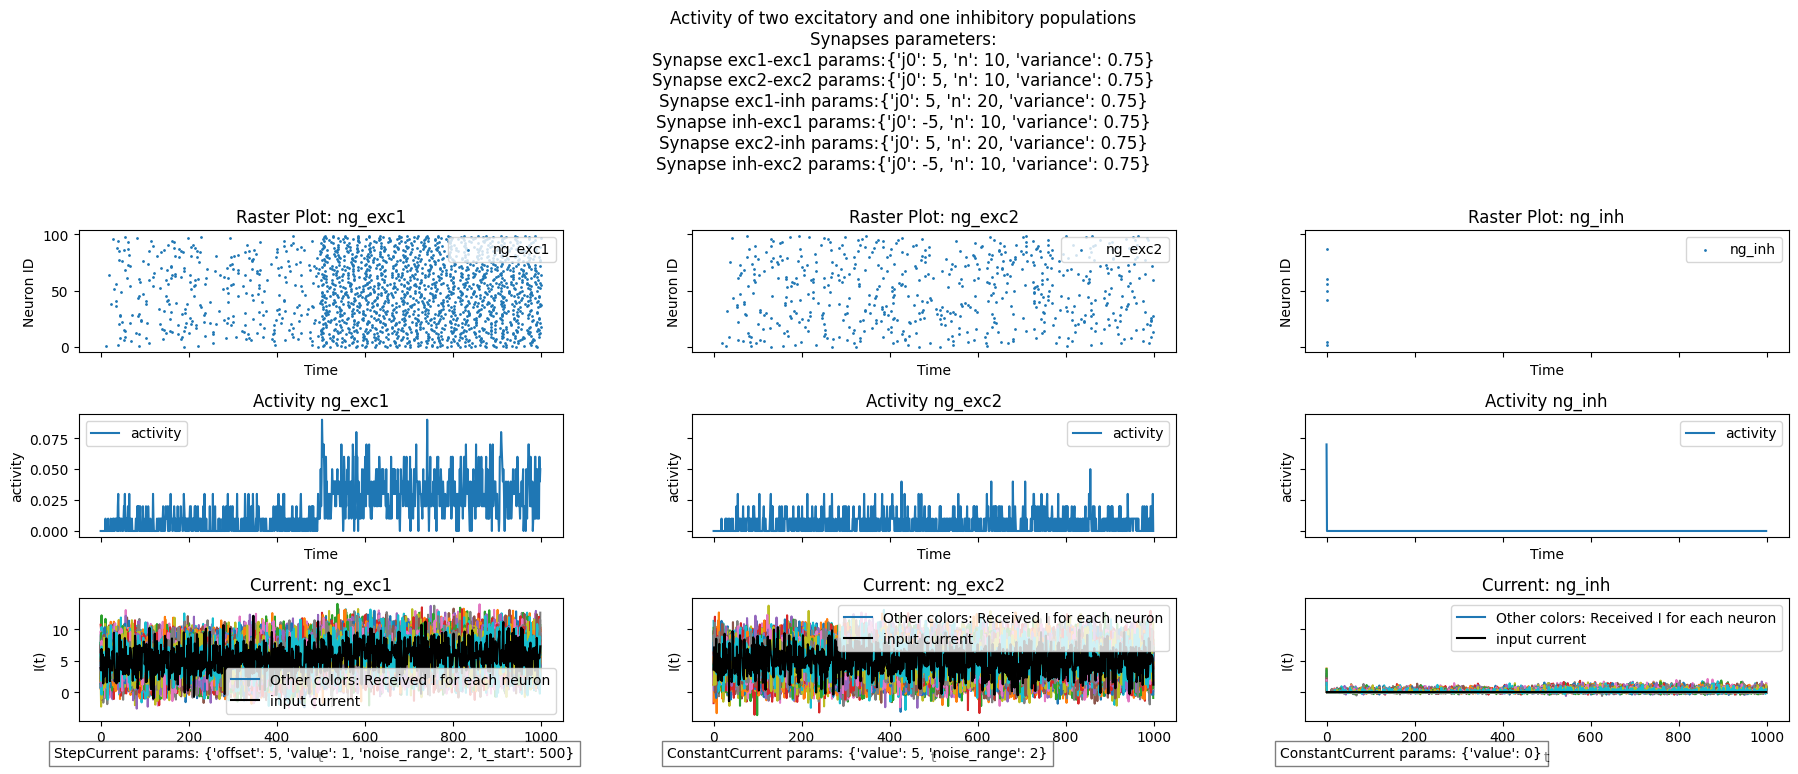

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(18, 8), sharex=True, sharey='row')
ng_exc1.add_raster_plot(axs[0, 0], s=1)
ng_exc2.add_raster_plot(axs[0, 1], s=1)
ng_inh.add_raster_plot(axs[0, 2], s=1)

ng_exc1.add_activity_plot(axs[1, 0])
ng_exc2.add_activity_plot(axs[1, 1])
ng_inh.add_activity_plot(axs[1, 2])

ng_exc1.add_current_plot(axs[2, 0])
ng_exc1.add_current_params_info(axs[2, 0], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_exc2.add_current_plot(axs[2, 1])
ng_exc2.add_current_params_info(axs[2, 1], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_inh.add_current_plot(axs[2, 2])
ng_inh.add_current_params_info(axs[2, 2], text_x=-0.05, text_y=-0.3, current_idx=2)

# sim.add_synapses_params_info(axs[2, 1], text_y=-0.5, synapse_idx=4)
fig.suptitle("Activity of two excitatory and one inhibitory populations\n" + sim.get_synapses_params_info())
plt.tight_layout()
plt.savefig("report/plots/part4-fixed-synapse-high-n-exc-inh.pdf")
plt.show()

Increase n in inh-exc

In [22]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}))
ng_exc1 =  sim.add_neuron_group(
    tag="ng_exc1",
    size=100,
    behavior={
        1: SetCurrent(),
        2: StepCurrent(offset=5,
                       value=1,
                       noise_range=2,
                       t_start=500),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)
ng_exc2 =  sim.add_neuron_group(
    tag="ng_exc2",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=5,
                           noise_range=2),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc2_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc2_event")
    }
)
ng_inh = sim.add_neuron_group(
    tag="ng_inh",
    size=100,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=0),
        6: Dendrite(),
        7: LIF(
            tau=3,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=10,
            u_init="normal(-67,10)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_inh_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inh_event")
    }
)
# Synapse for inside connection of NG_EXC_1
syn_exc_1 = sim.add_synapse_group(
                   tag="exc1-exc1",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})

# Synapse for inside connection of NG_EXC_2
syn_exc_2 = sim.add_synapse_group(
                   tag="exc2-exc2",
                   src=ng_exc2,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})

# Synapse for inside connection of NG_INH
# syn_inh = net.add_synapse_group(
#                    tag="inh-inh",
#                    src=ng_inh,
#                    dst=ng_inh,
#                    behavior={4: RandomConnectedFixedInputSynapse(j0=-100, n=50, variance=0.45, alpha=0.9)})

# # Synapse for connection from NG_EXC_1 to NG_INH
syn_exc_1_inh = sim.add_synapse_group(
                   tag="exc1-inh",
                   src=ng_exc1,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})


# # Synapse for connection from to NG_INH to NG_EXC_1
syn_inh_exc_1 = sim.add_synapse_group(
                   tag="inh-exc1",
                   src=ng_inh,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-5, n=20, variance=0.75)})

# # Synapse for connection from NG_EXC_2 to NG_INH
syn_exc_2_inh = sim.add_synapse_group(
                   tag="exc2-inh",
                   src=ng_exc2,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=5, n=10, variance=0.75)})
# # Synapse for connection from to NG_INH to NG_EXC_2
syn_inh_exc_2 = sim.add_synapse_group(
                   tag="inh-exc2",
                   src=ng_inh,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-5, n=20, variance=0.75)})

sim.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(300)|3 groups, Synapses: tensor(60000)|6 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:StepCurrent(offset=5,value=1,noise_range=2,t_start=500,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
NeuronGroup['ng_exc2', 'CustomNeuronGroup', 'ng'](100){1:SetCurrent()2:ConstantCurrent(value=5,noise_range=2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,10),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc2_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate

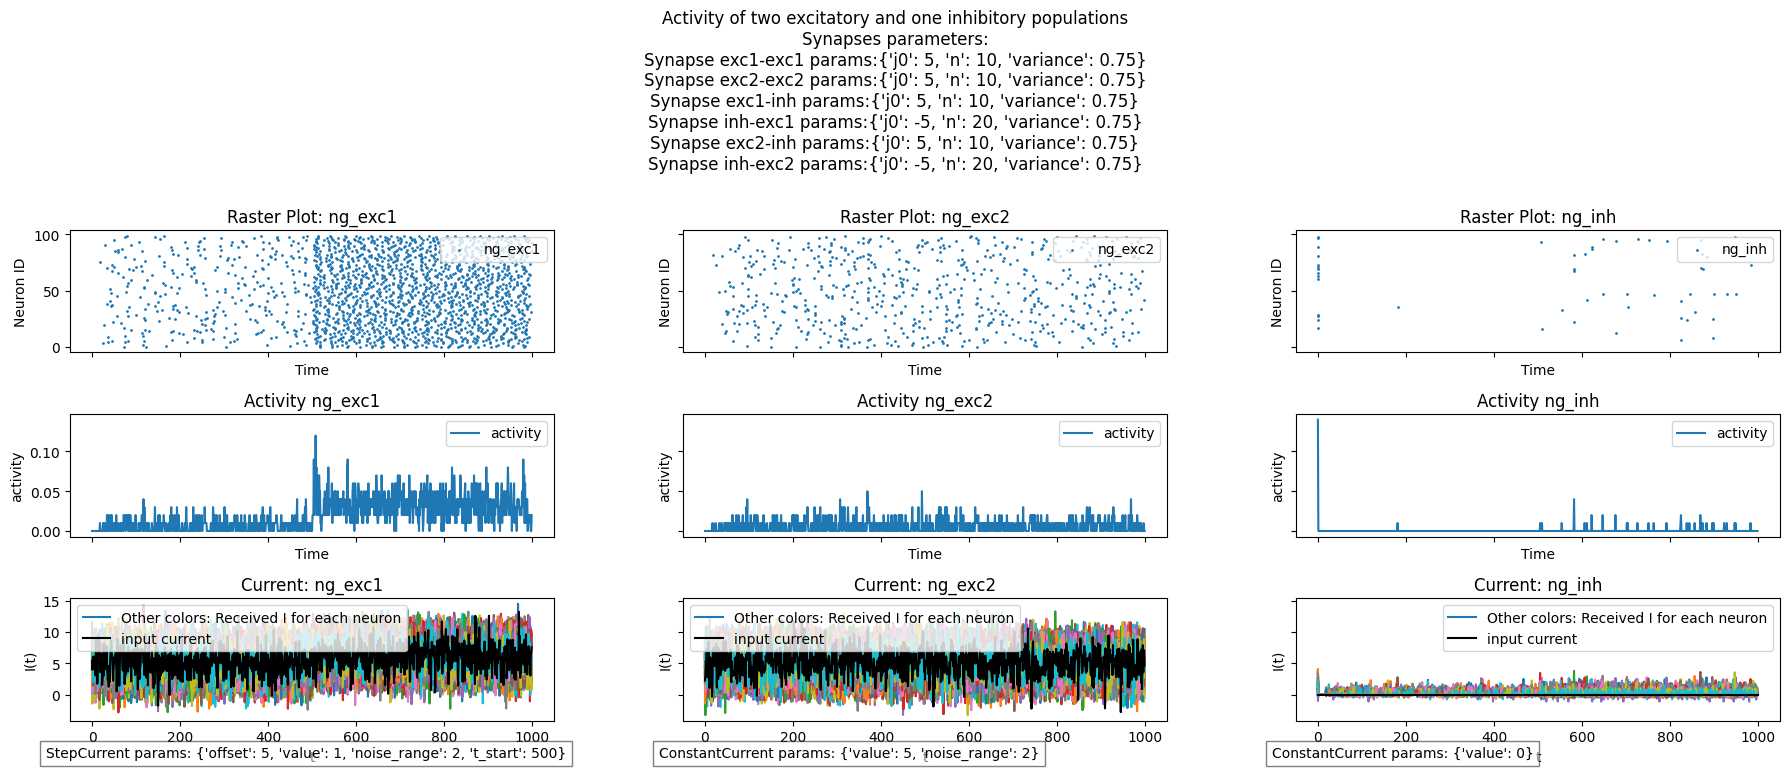

In [23]:
fig, axs = plt.subplots(3, 3, figsize=(18, 8), sharex=True, sharey='row')
ng_exc1.add_raster_plot(axs[0, 0], s=1)
ng_exc2.add_raster_plot(axs[0, 1], s=1)
ng_inh.add_raster_plot(axs[0, 2], s=1)

ng_exc1.add_activity_plot(axs[1, 0])
ng_exc2.add_activity_plot(axs[1, 1])
ng_inh.add_activity_plot(axs[1, 2])

ng_exc1.add_current_plot(axs[2, 0])
ng_exc1.add_current_params_info(axs[2, 0], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_exc2.add_current_plot(axs[2, 1])
ng_exc2.add_current_params_info(axs[2, 1], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_inh.add_current_plot(axs[2, 2])
ng_inh.add_current_params_info(axs[2, 2], text_x=-0.05, text_y=-0.3, current_idx=2)

# sim.add_synapses_params_info(axs[2, 1], text_y=-0.5, synapse_idx=4)
fig.suptitle("Activity of two excitatory and one inhibitory populations\n" + sim.get_synapses_params_info())
plt.tight_layout()
plt.savefig("report/plots/part4-fixed-synapse-high-n-inh-exc.pdf")
plt.show()

### Change in size

In [24]:
sim = Simulation(net=Network(behavior={1: TimeResolution(dt=1.0,)}))
ng_exc1 =  sim.add_neuron_group(
    tag="ng_exc1",
    size=50,
    behavior={
        1: SetCurrent(),
        2: StepCurrent(offset=6.5,
                       value=1,
                       noise_range=2,
                       t_start=500),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc1_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc1_event")
    }
)
ng_exc2 =  sim.add_neuron_group(
    tag="ng_exc2",
    size=50,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=6.5,
                           noise_range=2),
        6: Dendrite(),
        7: LIF(
            tau=10,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=1.7,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_exc2_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_exc2_event")
    }
)
ng_inh = sim.add_neuron_group(
    tag="ng_inh",
    size=50,
    behavior={
        1: SetCurrent(),
        2: ConstantCurrent(value=0),
        6: Dendrite(),
        7: LIF(
            tau=3,
            u_rest=-65,
            u_reset=-70,
            threshold=-55,
            R=10,
            u_init="normal(-67,5)"
        ),
        8: ActivityRecorder(),
        9: Recorder(variables=["u", "I","inp_I", "activity"], tag="ng_inh_rec"),
        10: EventRecorder(variables=['spike'], tag="ng_inh_event")
    }
)
# Synapse for inside connection of NG_EXC_1
syn_exc_1 = sim.add_synapse_group(
                   tag="exc1-exc1",
                   src=ng_exc1,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=7, n=20, variance=0.75)})

# Synapse for inside connection of NG_EXC_2
syn_exc_2 = sim.add_synapse_group(
                   tag="exc2-exc2",
                   src=ng_exc2,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=7, n=20, variance=0.75)})

# Synapse for inside connection of NG_INH
# syn_inh = net.add_synapse_group(
#                    tag="inh-inh",
#                    src=ng_inh,
#                    dst=ng_inh,
#                    behavior={4: RandomConnectedFixedInputSynapse(j0=-100, n=50, variance=0.45, alpha=0.9)})

# # Synapse for connection from NG_EXC_1 to NG_INH
syn_exc_1_inh = sim.add_synapse_group(
                   tag="exc1-inh",
                   src=ng_exc1,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=15, n=20, variance=0.75),
                             9: Recorder(variables=["I"], tag="exc1-inh_rec")})

# # Synapse for connection from to NG_INH to NG_EXC_1
syn_inh_exc_1 = sim.add_synapse_group(
                   tag="inh-exc1",
                   src=ng_inh,
                   dst=ng_exc1,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-12, n=12, variance=0.75)})

# # Synapse for connection from NG_EXC_2 to NG_INH
syn_exc_2_inh = sim.add_synapse_group(
                   tag="exc2-inh",
                   src=ng_exc2,
                   dst=ng_inh,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=15, n=20, variance=0.75)})
# # Synapse for connection from to NG_INH to NG_EXC_2
syn_inh_exc_2 = sim.add_synapse_group(
                   tag="inh-exc2",
                   src=ng_inh,
                   dst=ng_exc2,
                   behavior={4: RandomConnectedFixedInputSynapse(j0=-12, n=12, variance=0.75)})

sim.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(150)|3 groups, Synapses: tensor(15000)|6 groups){1:TimeResolution(dt=1.0,)}
NeuronGroup['ng_exc1', 'CustomNeuronGroup', 'ng'](50){1:SetCurrent()2:StepCurrent(offset=6.5,value=1,noise_range=2,t_start=500,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc1_event,)}
NeuronGroup['ng_exc2', 'CustomNeuronGroup', 'ng'](50){1:SetCurrent()2:ConstantCurrent(value=6.5,noise_range=2,)6:Dendrite()7:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-55,R=1.7,u_init=normal(-67,5),)8:ActivityRecorder()9:Recorder(variables=['u', 'I', 'inp_I', 'activity'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_exc2_rec,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate

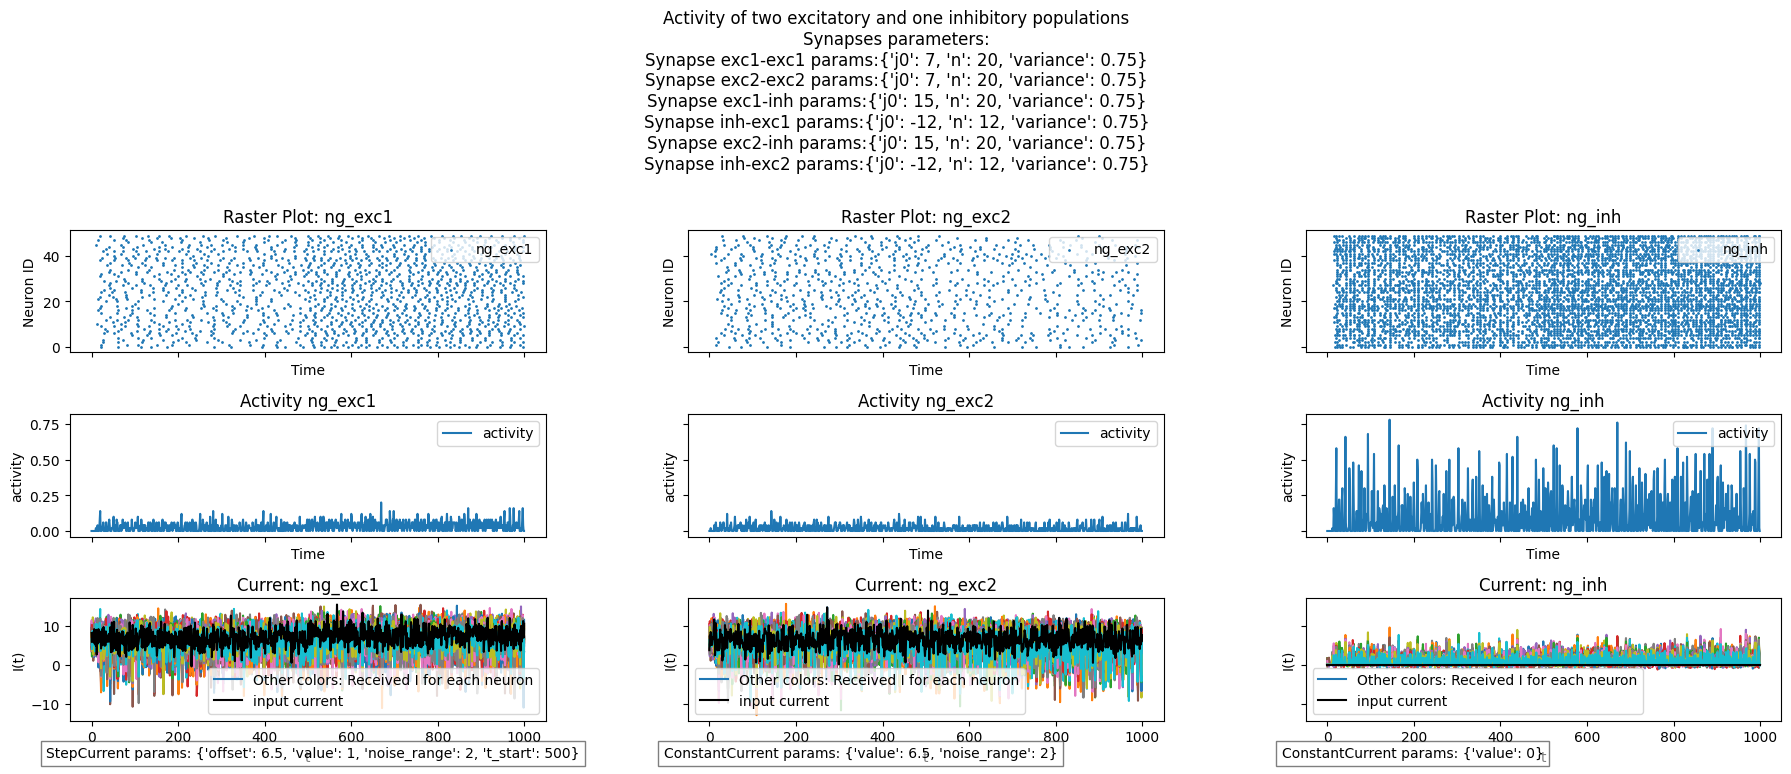

In [25]:
fig, axs = plt.subplots(3, 3, figsize=(18, 8), sharex=True, sharey='row')
ng_exc1.add_raster_plot(axs[0, 0], s=1)
ng_exc2.add_raster_plot(axs[0, 1], s=1)
ng_inh.add_raster_plot(axs[0, 2], s=1)

ng_exc1.add_activity_plot(axs[1, 0])
ng_exc2.add_activity_plot(axs[1, 1])
ng_inh.add_activity_plot(axs[1, 2])

ng_exc1.add_current_plot(axs[2, 0])
ng_exc1.add_current_params_info(axs[2, 0], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_exc2.add_current_plot(axs[2, 1])
ng_exc2.add_current_params_info(axs[2, 1], text_x=-0.05, text_y=-0.3, current_idx=2)
ng_inh.add_current_plot(axs[2, 2])
ng_inh.add_current_params_info(axs[2, 2], text_x=-0.05, text_y=-0.3, current_idx=2)

# sim.add_synapses_params_info(axs[2, 1], text_y=-0.5, synapse_idx=4)
fig.suptitle("Activity of two excitatory and one inhibitory populations\n" + sim.get_synapses_params_info())
plt.tight_layout()
plt.savefig("report/plots/part4-fixed-synapse-high-size.pdf")
plt.show()